## **AUTHOR: SYED MUHAMMAD USMAN GHANI**

**Task 7 - Stock Market Prediction using Numerical and Textual Analysis**

**@SPARKS FOUNDATION**

- **Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices and sentimental analysis of news headlines**

- **Stock to analyze and predict - SENSEX (S&P BSE SENSEX)**

## DECLARING LIBRARIES

In [38]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

## LOADING DATAFRAMES

In [62]:
stock_prices = pd.read_csv('BSESN.csv')
news_headline = pd.read_csv('india-news-headlines.csv')

## Manipulating STOCKS DATA

In [63]:
stock_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-17,41324.039063,41420.339844,41030.578125,41055.691406,41055.691406,6900.0
1,2020-02-18,41042.460938,41042.460938,40610.949219,40894.378906,40894.378906,12300.0
2,2020-02-19,41121.511719,41357.160156,41048.929688,41323.000000,41323.000000,5600.0
3,2020-02-20,41334.960938,41399.929688,41134.308594,41170.121094,41170.121094,8400.0
4,2020-02-24,41037.011719,41037.011719,40306.359375,40363.230469,40363.230469,8100.0
...,...,...,...,...,...,...,...
246,2021-02-11,51165.839844,51592.449219,51157.308594,51531.519531,51531.519531,12100.0
247,2021-02-12,51614.769531,51804.578125,51260.621094,51544.300781,51544.300781,15100.0
248,2021-02-15,NaN,NaN,NaN,NaN,NaN,NaN
249,2021-02-16,52400.031250,52516.761719,51863.609375,52104.171875,52104.171875,21100.0


In [64]:
np.shape(stock_prices)

(251, 7)

In [65]:
stock_prices.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,39000.772697,39288.858320,38581.924813,38942.450597,38942.450597,20386.290323
std,6126.057272,6040.456990,6205.509568,6148.554755,6148.554755,16183.874289
min,26499.810547,27462.869141,25638.900391,25981.240234,25981.240234,0.000000
25%,34305.207031,34699.283203,33955.879883,34237.300781,34237.300781,14675.000000
50%,38476.410157,38742.685547,38217.509765,38413.355469,38413.355469,18300.000000
75%,43516.079102,43784.606445,43209.100586,43595.244141,43595.244141,22200.000000
max,52400.031250,52516.761719,51863.609375,52104.171875,52104.171875,188300.000000


In [66]:
stock_prices.dropna(inplace=True)

In [67]:
stock_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-17,41324.039063,41420.339844,41030.578125,41055.691406,41055.691406,6900.0
1,2020-02-18,41042.460938,41042.460938,40610.949219,40894.378906,40894.378906,12300.0
2,2020-02-19,41121.511719,41357.160156,41048.929688,41323.000000,41323.000000,5600.0
3,2020-02-20,41334.960938,41399.929688,41134.308594,41170.121094,41170.121094,8400.0
4,2020-02-24,41037.011719,41037.011719,40306.359375,40363.230469,40363.230469,8100.0


In [8]:
np.shape(stock_prices)

(248, 7)

## MANIPULATING NEWS HEADLINE DATA

In [9]:
news_headline.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [10]:
headline = news_headline[news_headline['headline_category']!='unknown']

In [11]:
headline.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
86,20010102,entertainment.hindi.bollywood,Raju Chacha
127,20010103,entertainment.hindi.bollywood,'Devdas': Jinxed?
273,20010104,india,Dudhwa tiger died of starvation; not poisoning
274,20010104,city.bengaluru,Three in race for chief secy's post


In [12]:
np.shape(headline)

(3089440, 3)

In [13]:
headline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3089440 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 94.3+ MB


In [14]:
headline['publish_date'] = pd.to_datetime(headline['publish_date'], format='%Y%m%d')

c:\users\computer\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
headline = headline[['publish_date', 'headline_text']]

In [16]:
headline.drop_duplicates(subset='headline_text',keep='first',inplace=True)

In [17]:
headline['headline_text'] = headline.groupby('publish_date').transform(lambda x: ' '.join(x))

In [18]:
headline

,publish_date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
86,2001-01-02,Raju Chacha
127,2001-01-03,'Devdas': Jinxed?
273,2001-01-04,Dudhwa tiger died of starvation; not poisoning...
274,2001-01-04,Dudhwa tiger died of starvation; not poisoning...
...,...,...
3297167,2020-06-30,Detective Byomkesh Bakshy! Edge of Tomorrow Fi...
3297168,2020-06-30,Detective Byomkesh Bakshy! Edge of Tomorrow Fi...
3297169,2020-06-30,Detective Byomkesh Bakshy! Edge of Tomorrow Fi...
3297170,2020-06-30,Detective Byomkesh Bakshy! Edge of Tomorrow Fi...


In [19]:
headline.drop_duplicates(subset='headline_text',keep='first',inplace=True)

In [20]:
headline

,publish_date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
86,2001-01-02,Raju Chacha
127,2001-01-03,'Devdas': Jinxed?
273,2001-01-04,Dudhwa tiger died of starvation; not poisoning...
405,2001-01-05,Nepal won't allow anti-India activities: Envoy...
...,...,...
3294593,2020-06-26,Containment zone residents slam high prices ch...
3295093,2020-06-27,like me i wont let you have a toxic relationsh...
3295620,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
3296120,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


## SENITIMENTAL ANALYSIS

**DECLARING LIBRARIES**

In [21]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


c:\users\computer\appdata\local\programs\python\python36\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


**CREATING MODEL**

In [22]:
model = SentimentIntensityAnalyzer()

**Polarity:**

**Measure of how positive or negative or neutral a statement is.**

In [23]:
headline['polarity_score'] = [TextBlob(x).sentiment.polarity for x in headline['headline_text']]

**Subjectivity:**

**It is a measure of is the statment factual(Objectivity) or it just refer to personal opinion, emotions and judgement(Subjectivity).**

In [24]:
headline['subjectivity_score'] = [TextBlob(x).sentiment.subjectivity for x in headline['headline_text']]

**CHECKING THE SCORES FOR EACH HEADLINE**

In [26]:
x = [model.polarity_scores(x)['pos'] for x in headline['headline_text']]

In [27]:
headline['positive'] = x

In [28]:
headline

,publish_date,headline_text,polarity_score,subjectivity_score,positive
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333,0.297
86,2001-01-02,Raju Chacha,0.000000,0.000000,0.000
127,2001-01-03,'Devdas': Jinxed?,0.000000,0.000000,0.000
273,2001-01-04,Dudhwa tiger died of starvation; not poisoning...,0.000000,0.000000,0.067
405,2001-01-05,Nepal won't allow anti-India activities: Envoy...,1.000000,0.300000,0.265
...,...,...,...,...,...
3294593,2020-06-26,Containment zone residents slam high prices ch...,0.069856,0.382764,0.089
3295093,2020-06-27,like me i wont let you have a toxic relationsh...,0.075936,0.395716,0.090
3295620,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...,0.050513,0.403735,0.072
3296120,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...,0.061534,0.399726,0.085


In [29]:
y = [model.polarity_scores(x)['neg'] for x in headline['headline_text']]

In [30]:
headline['negative'] = y

In [31]:
headline

,publish_date,headline_text,polarity_score,subjectivity_score,positive,negative
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333,0.297,0.230
86,2001-01-02,Raju Chacha,0.000000,0.000000,0.000,0.000
127,2001-01-03,'Devdas': Jinxed?,0.000000,0.000000,0.000,0.000
273,2001-01-04,Dudhwa tiger died of starvation; not poisoning...,0.000000,0.000000,0.067,0.123
405,2001-01-05,Nepal won't allow anti-India activities: Envoy...,1.000000,0.300000,0.265,0.105
...,...,...,...,...,...,...
3294593,2020-06-26,Containment zone residents slam high prices ch...,0.069856,0.382764,0.089,0.162
3295093,2020-06-27,like me i wont let you have a toxic relationsh...,0.075936,0.395716,0.090,0.161
3295620,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...,0.050513,0.403735,0.072,0.146
3296120,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...,0.061534,0.399726,0.085,0.143


In [32]:
z = [model.polarity_scores(x)['neu'] for x in headline['headline_text']]

In [33]:
headline['neutral'] = z

In [34]:
w = [model.polarity_scores(x)['compound'] for x in headline['headline_text']]

In [35]:
headline['compound'] = w

In [36]:
headline

,publish_date,headline_text,polarity_score,subjectivity_score,positive,negative,neutral,compound
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333,0.297,0.230,0.473,-0.0000
86,2001-01-02,Raju Chacha,0.000000,0.000000,0.000,0.000,1.000,0.0000
127,2001-01-03,'Devdas': Jinxed?,0.000000,0.000000,0.000,0.000,1.000,0.0000
273,2001-01-04,Dudhwa tiger died of starvation; not poisoning...,0.000000,0.000000,0.067,0.123,0.810,-0.3670
405,2001-01-05,Nepal won't allow anti-India activities: Envoy...,1.000000,0.300000,0.265,0.105,0.630,0.5475
...,...,...,...,...,...,...,...,...
3294593,2020-06-26,Containment zone residents slam high prices ch...,0.069856,0.382764,0.089,0.162,0.749,-0.9999
3295093,2020-06-27,like me i wont let you have a toxic relationsh...,0.075936,0.395716,0.090,0.161,0.749,-0.9999
3295620,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...,0.050513,0.403735,0.072,0.146,0.782,-0.9999
3296120,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...,0.061534,0.399726,0.085,0.143,0.772,-0.9999


## PLOTING STOCKS CLOSING POINTS

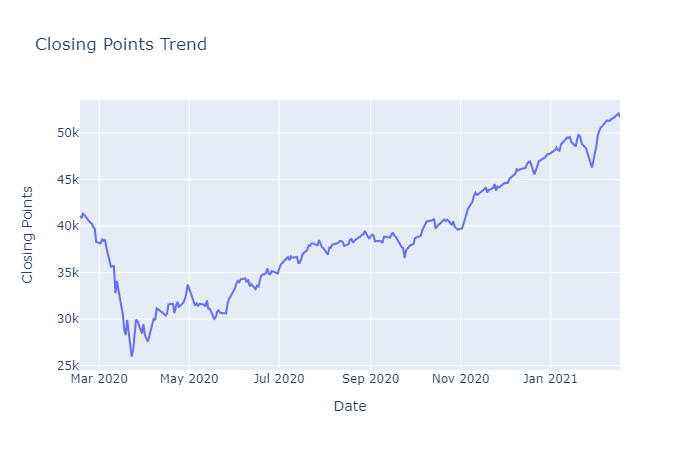

In [40]:
fig = px.line(x=stock_prices['Date'],y=stock_prices['Close'],labels={'x':'Date','y':'Closing Points'},title='Closing Points Trend')
fig.show('png')

## PLOTTING MOVING WINDOW AVERAGE CLOSE POINTS

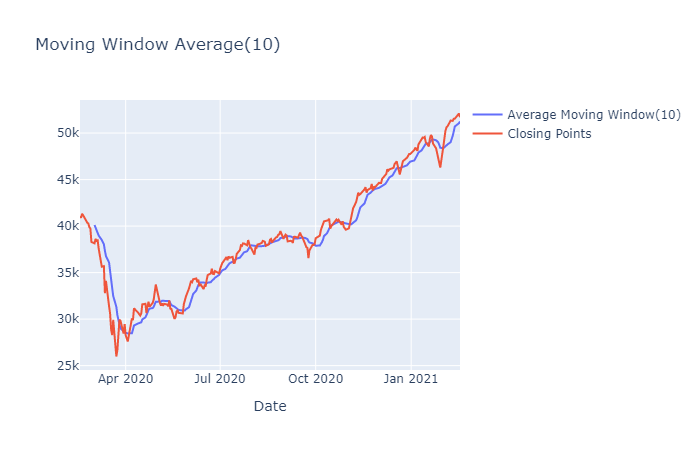

In [148]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=stock_prices['Date'],y=stock_prices['Close'].rolling(window = 10).mean(),
                          name='Average Moving Window(10)',mode='lines'))
fig.add_trace(go.Scatter(x=stock_prices['Date'],y=stock_prices['Close'],
                          name='Closing Points',mode='lines'))
fig.update_layout(title='Moving Window Average(10)',xaxis_title='Date')
fig.show('png')

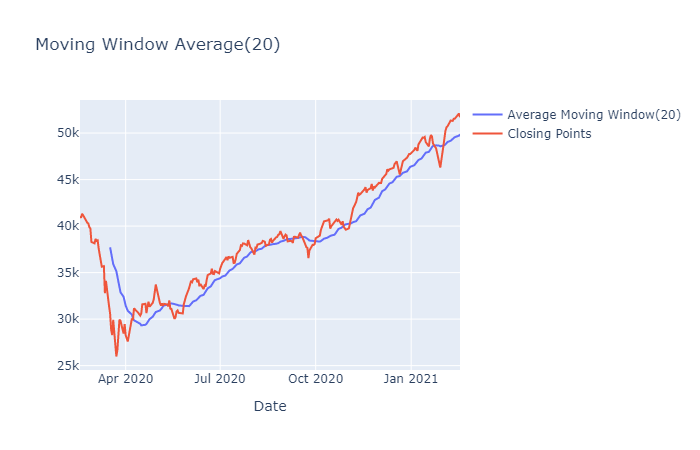

In [149]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=stock_prices['Date'],y=stock_prices['Close'].rolling(window = 20).mean(),
                          name='Average Moving Window(20)',mode='lines'))
fig.add_trace(go.Scatter(x=stock_prices['Date'],y=stock_prices['Close'],
                          name='Closing Points',mode='lines'))
fig.update_layout(title='Moving Window Average(20)',xaxis_title='Date')
fig.show('png')

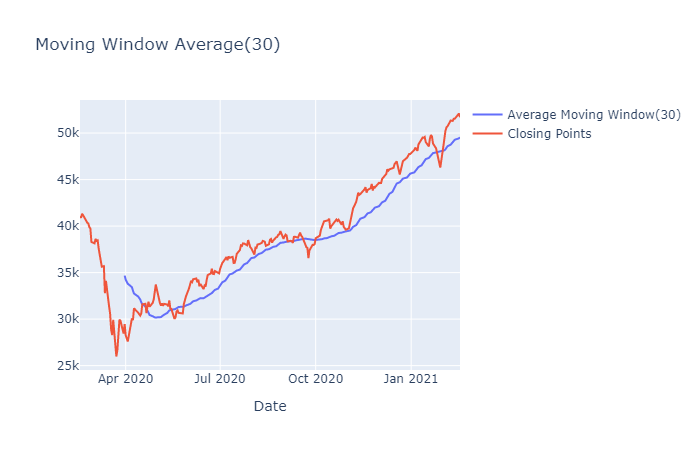

In [150]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=stock_prices['Date'],y=stock_prices['Close'].rolling(window = 30).mean(),
                          name='Average Moving Window(30)',mode='lines'))
fig.add_trace(go.Scatter(x=stock_prices['Date'],y=stock_prices['Close'],
                          name='Closing Points',mode='lines'))
fig.update_layout(title='Moving Window Average(30)',xaxis_title='Date')
fig.show('png')

## MANIPULATING DATAFRAMES TO MERGE

In [53]:
headline.rename(columns={'publish_date':'Date'},inplace=True)

In [74]:
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'], format='%Y%m%d',infer_datetime_format=True)

In [76]:
df = pd.merge(stock_prices,headline,on='Date',how='inner')

In [77]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,polarity_score,subjectivity_score,positive,negative,neutral,compound
0,2020-02-17,41324.039063,41420.339844,41030.578125,41055.691406,41055.691406,6900.0,VIDEO STORY: Dr.samir Parikh's tips for kids a...,0.056508,0.342316,0.080,0.169,0.752,-0.9999
1,2020-02-18,41042.460938,41042.460938,40610.949219,40894.378906,40894.378906,12300.0,'Mammukka didn't want Kadakkal Chandran to res...,0.078717,0.360463,0.073,0.141,0.786,-0.9999
2,2020-02-19,41121.511719,41357.160156,41048.929688,41323.000000,41323.000000,5600.0,AAP's Delhi win won't impact Goa voters: Digam...,0.041818,0.353285,0.082,0.185,0.732,-1.0000
3,2020-02-20,41334.960938,41399.929688,41134.308594,41170.121094,41170.121094,8400.0,'Some houses of Jamtara villagers bigger than ...,0.068827,0.383781,0.071,0.152,0.777,-0.9999
4,2020-02-24,41037.011719,41037.011719,40306.359375,40363.230469,40363.230469,8100.0,Horoscope Today; February 24; 2020: Check astr...,0.042636,0.400925,0.063,0.138,0.799,-0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,I never thought I had a voice until today: Vid...,0.088933,0.384712,0.077,0.133,0.790,-0.9999
85,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0,Truck firms look for new export markets to sel...,0.026206,0.405185,0.063,0.137,0.800,-0.9999
86,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,Containment zone residents slam high prices ch...,0.069856,0.382764,0.089,0.162,0.749,-0.9999
87,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,6 hot and stylish bikini looks of Katrina Kaif...,0.061534,0.399726,0.085,0.143,0.772,-0.9999


In [78]:
stocks_news_df = final_df = df[['Close', 'polarity_score', 'negative', 'neutral', 
                                'positive', 'compound', 'subjectivity_score']]

In [80]:
stocks_news_df

,Close,polarity_score,negative,neutral,positive,compound,subjectivity_score
0,41055.691406,0.056508,0.169,0.752,0.080,-0.9999,0.342316
1,40894.378906,0.078717,0.141,0.786,0.073,-0.9999,0.360463
2,41323.000000,0.041818,0.185,0.732,0.082,-1.0000,0.353285
3,41170.121094,0.068827,0.152,0.777,0.071,-0.9999,0.383781
4,40363.230469,0.042636,0.138,0.799,0.063,-0.9999,0.400925
...,...,...,...,...,...,...,...
84,34868.980469,0.088933,0.133,0.790,0.077,-0.9999,0.384712
85,34842.101563,0.026206,0.137,0.800,0.063,-0.9999,0.405185
86,35171.269531,0.069856,0.162,0.749,0.089,-0.9999,0.382764
87,34961.519531,0.061534,0.143,0.772,0.085,-0.9999,0.399726


## DECLARING LIBRARIES FOR TRAINING AND EVALUATING PURPOSE

In [120]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

In [82]:
# features
X = stocks_news_df.iloc[:,1:].values

# labels
Y = stocks_news_df.iloc[:,0].values

In [83]:
np.shape(X)

(89, 6)

In [85]:
X[:5]

array([[ 0.05650808,  0.169     ,  0.752     ,  0.08      , -0.9999    ,
         0.3423159 ],
       [ 0.0787166 ,  0.141     ,  0.786     ,  0.073     , -0.9999    ,
         0.36046347],
       [ 0.04181781,  0.185     ,  0.732     ,  0.082     , -1.        ,
         0.35328501],
       [ 0.06882747,  0.152     ,  0.777     ,  0.071     , -0.9999    ,
         0.3837808 ],
       [ 0.04263609,  0.138     ,  0.799     ,  0.063     , -0.9999    ,
         0.40092544]])

In [84]:
np.shape(Y)

(89,)

In [86]:
Y[:5]

array([41055.691406, 40894.378906, 41323.      , 41170.121094,
       40363.230469])

## Pre-Processing Data

In [136]:
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.20,random_state=0)

## CREATING DECISION TREE REGRESSOR MODEL

In [137]:
clf = tree.DecisionTreeRegressor().fit(train_X,train_Y)

In [138]:
r_sq = clf.score(train_X,train_Y)
print('coeffiecent of determination: ', r_sq)

coeffiecent of determination:  1.0


## EVALUATE DECISION TREE REGRESSOR

In [139]:
pred_y=clf.predict(test_X)

**COMPARING ACTUAL AND PREDICTED VALUES**

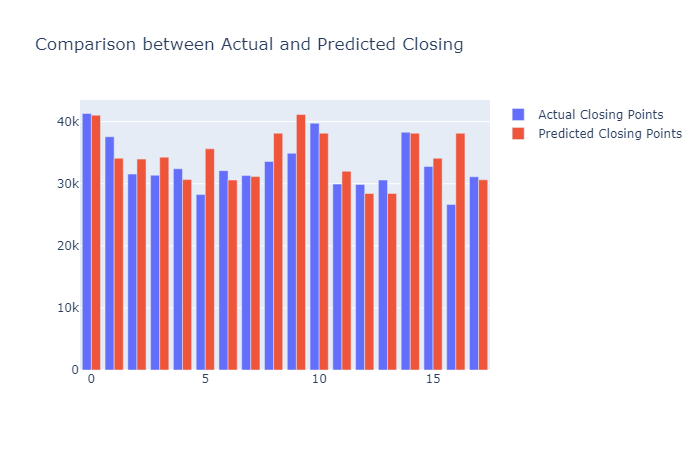

In [140]:
fig = go.Figure()
fig.add_trace(go.Bar(y=test_Y, name='Actual Closing Points'))
fig.add_trace(go.Bar(y=pred_y, name='Predicted Closing Points'))
fig.update_layout(title='Comparison between Actual and Predicted Closing')
fig.show("png")

In [141]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(test_Y, pred_y))

Mean Absolute Error: 2854.5709635


In [ ]:
## RANDOME

In [142]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(train_X,train_Y)

In [143]:
pred_Y=rf.predict(test_X)

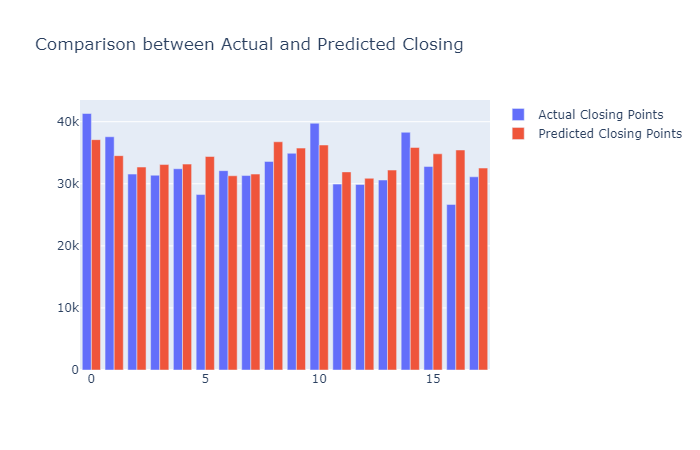

In [144]:
fig = go.Figure()
fig.add_trace(go.Bar(y=test_Y, name='Actual Closing Points'))
fig.add_trace(go.Bar(y=pred_Y, name='Predicted Closing Points'))
fig.update_layout(title='Comparison between Actual and Predicted Closing')
fig.show("png")

In [146]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(test_Y, pred_Y))

Mean Absolute Error: 2487.810850823894
